In [51]:
# Importing packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta as dt

In [52]:
#Populating DataFrame with Ruter_data.csv info
ruterdata = pd.read_csv("Ruter_data.csv", sep=";")

In [53]:
#Visualization and cleaning of passenger frequency 

Text(0, 0.5, 'Frequency')

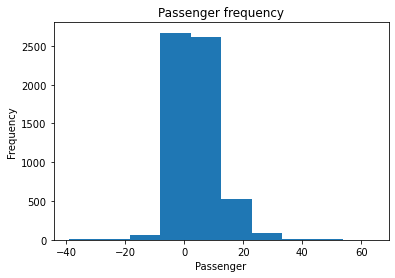

In [54]:
# Visualizing passenger frequency with outliers

# create figure and axis using matplotlib
fig, ax = plt.subplots()
# plot histogram
ax.hist(ruterdata['Passasjerer_Ombord'])
# set title and labels
ax.set_title('Passenger frequency')
ax.set_xlabel('Passenger')
ax.set_ylabel('Frequency')

In [55]:
# Removing outliers in Passasjerer_Ombord
threshold_max = ruterdata['Passasjerer_Ombord'].quantile(0.99)
threshold_min = ruterdata['Passasjerer_Ombord'].quantile(0.01)
ruterdata_clean = ruterdata[(ruterdata['Passasjerer_Ombord'] <threshold_max) & (ruterdata['Passasjerer_Ombord'] >threshold_min)]

Text(0, 0.5, 'Frequency')

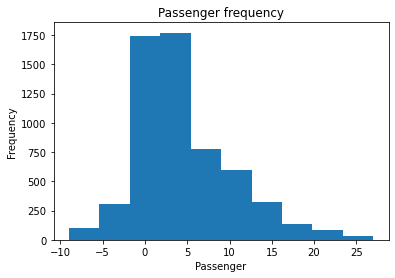

In [56]:
# Visualization after removing outliers
fig, ax = plt.subplots()
ax.hist(ruterdata_clean['Passasjerer_Ombord'])
ax.set_title('Passenger frequency')
ax.set_xlabel('Passenger')
ax.set_ylabel('Frequency')

In [57]:
# Visualizeing of average delays throughout a day, and night

In [58]:
# Making column names more user friendly 
delay_data = ruterdata.rename(columns={'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra': 'Faktisk_Ankomst', 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra': 'Faktisk_Avgang','Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra': 'Planlagt_Ankomst', 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra': 'Planlagt_Avgang'})

In [59]:
# New DataFrame with usefull values
delay_data = delay_data.filter(items=['Faktisk_Ankomst','Planlagt_Ankomst'])

In [60]:
# Removing all emty rows ( : )
delay_data = delay_data[delay_data.Faktisk_Ankomst != ':']

In [61]:
# Converts from DateTime to H,M,S
delay_data[['Faktisk_Timer','Faktisk_Minutter','Faktisk_Sekunder']] = delay_data['Faktisk_Ankomst'].str.split(':',expand=True)
delay_data[['Planlagt_Timer','Planlagt_Minutter','Planlagt_Sekunder']] = delay_data['Planlagt_Ankomst'].str.split(':',expand=True)

In [62]:
# Converting the values to int64. Converting 24h and 25h to 00h and 01h
delay_data["Planlagt_Timer"] = pd.to_numeric(delay_data["Planlagt_Timer"])
delay_data["Planlagt_Timer"] = delay_data["Planlagt_Timer"].mod(24)
delay_data["Faktisk_Timer"] = pd.to_numeric(delay_data["Faktisk_Timer"])
delay_data["Faktisk_Timer"] = delay_data["Faktisk_Timer"].mod(24)

In [63]:
# Joining timer, minutter and sekunder into Faktisk_Ankomst
kolonner = ['Faktisk_Timer','Faktisk_Minutter', 'Faktisk_Sekunder']
delay_data['Faktisk_Ankomst'] = delay_data[kolonner].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)
kolonner = ['Planlagt_Timer','Planlagt_Minutter', 'Planlagt_Sekunder']
delay_data['Planlagt_Ankomst'] = delay_data[kolonner].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)

In [64]:
# New DataFrame with usefull columns
delay_data = delay_data.filter(items=['Faktisk_Ankomst','Planlagt_Ankomst', 'Planlagt_Timer'])
delay_data = delay_data.rename(columns={'Planlagt_Timer': 'Timer'})

In [65]:
# Converting from String to DateTime
delay_data["Faktisk_Ankomst"] = delay_data["Faktisk_Ankomst"].astype("datetime64")
delay_data["Planlagt_Ankomst"] = delay_data["Planlagt_Ankomst"].astype("datetime64")

In [66]:
# Finding difference between Faktisk_Ankomst and Planlagt_Ankomst, and converting it to seconds
delay_data['Differanse'] = (delay_data.Faktisk_Ankomst - delay_data.Planlagt_Ankomst)
delay_data['Differanse'] = delay_data['Differanse'].dt.total_seconds()

In [67]:
# New DataFrame with usefull columns
delay_data = delay_data.filter(items=['Timer','Differanse'])

In [68]:
# Groups data by hours, and finds the average delay for each hour
data = delay_data.groupby(delay_data['Timer']).mean()

In [69]:
# Removing outliers
threshold_max = delay_data["Differanse"].quantile(0.99)
threshold_min = delay_data["Differanse"].quantile(0.01)
ruterDataDag = delay_data[(delay_data["Differanse"] < threshold_max) & (delay_data["Differanse"] > threshold_min) & (delay_data['Timer'] >= 6)]
ruterDataNatt = delay_data[(delay_data["Differanse"] < threshold_max) & (delay_data["Differanse"] > threshold_min) & (delay_data['Timer'] <= 5)]

Text(0, 0.5, 'Forsinkelse (Sekunder)')

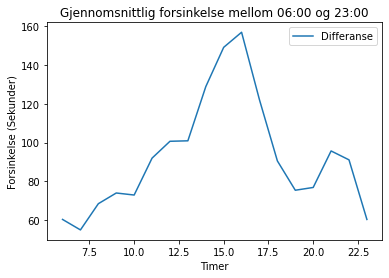

In [70]:
# Visualization of average delay in the timespam 06:00 to 23:00
ruterDataDag = ruterDataDag.groupby(ruterDataDag.Timer).mean()
forsinkelseGrafDag = ruterDataDag.plot.line(title="Gjennomsnittlig forsinkelse mellom 06:00 og 23:00")
forsinkelseGrafDag.set_xlabel("Timer")
forsinkelseGrafDag.set_ylabel("Forsinkelse (Sekunder)")

Text(0, 0.5, 'Forsinkelse (Sekunder)')

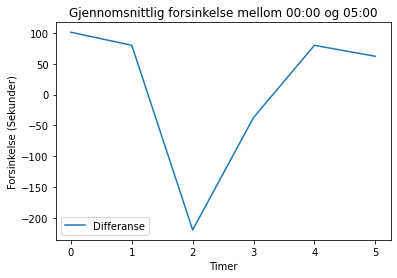

In [71]:
# Visualization of average delay in the timespam 00:00 to 05:00
ruterDataNatt = ruterDataNatt.groupby(ruterDataNatt.Timer).mean()
forsinkelseGrafNatt = ruterDataNatt.plot.line(title="Gjennomsnittlig forsinkelse mellom 00:00 og 05:00")
forsinkelseGrafNatt.set_xlabel("Timer")
forsinkelseGrafNatt.set_ylabel("Forsinkelse (Sekunder)")

In [72]:
# Visualization of number of rides every hour
# Visualization of average passengers every hour

In [73]:
# Dataframe with only passengers and time comlums
passengers_data = ruterdata.rename(columns={'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra': 'Faktisk_Ankomst', 'Passasjerer_Ombord': 'Passengers'})

In [74]:
# Filtering to only include arrival time and passernger count
passengers_data = passengers_data.filter(items=['Faktisk_Ankomst','Passengers'])

In [75]:
# Removing all rows with empty arrival time
passengers_data = passengers_data[passengers_data.Faktisk_Ankomst != ':']

In [76]:
# Dividing time into h, m, s
passengers_data[['Hour','Minutter','Sekunder']] = passengers_data['Faktisk_Ankomst'].str.split(':',expand=True)

In [77]:
# Converting 24h and 25h to 00h and 01h
passengers_data["Hour"] = pd.to_numeric(passengers_data["Hour"])
passengers_data["Hour"] = passengers_data["Hour"].mod(24)

In [78]:
passengers_data = passengers_data.filter(items=['Hour','Passengers'])

In [79]:
# Removing outlyers
threshold_max = passengers_data['Passengers'].quantile(0.99)
threshold_min = passengers_data['Passengers'].quantile(0.01)

In [80]:
# Removing rows with outlyers in the passenger column
passengers_data = passengers_data[(passengers_data['Passengers'] < threshold_max) & (passengers_data['Passengers'] > threshold_min)]

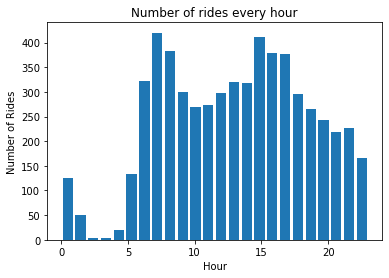

In [81]:
# Visualization of number of rides every hour
plt.hist(passengers_data.Hour, bins=24, rwidth=0.8) 
plt.xlabel('Hour') 
plt.ylabel('Number of Rides') 
plt.title('Number of rides every hour')
plt.show()

In [82]:
# Groups data by hours, and finds the average passengers every hour
data = passengers_data.groupby(passengers_data.Hour).mean()

Text(0.5, 1.0, 'Average passengers every hour')

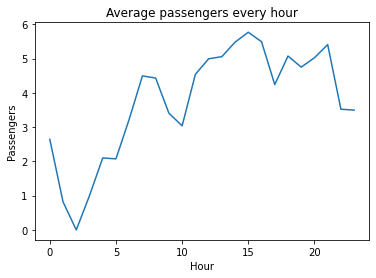

In [83]:
# Visualization of average passengers every hour
plot = sns.lineplot(x='Hour', y='Passengers', data=data)
plot.set_title('Average passengers every hour')